<a href="https://colab.research.google.com/github/sohan-shingade/NBA-Stats-Analysis/blob/main/NBAStatsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: install Pandas, Numpy, and matplotlib, and nba_api

!pip install pandas numpy matplotlib nba_api
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
from IPython.core.display import display, HTML
import ipywidgets as widgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.2/285.2 kB 4.2 MB/s eta 0:00:00


In [ ]:
#@title Search Players

from nba_api.stats.static import players


# Fetch NBA players data
nba_players = players.get_players()
data = [player["full_name"] for player in nba_players]

# Dictionary to hold selected players' information
selected_players_data = {}

# Function to filter players based on search query
def search_players(query):
    query = query.lower()
    return [name for name in data if query in name.lower()]

# Function to handle player selection
def on_player_click(player_name):
    if player_name not in selected_players_data:
        # Add player to dictionary with default values
        selected_players_data[player_name] = {'stat': 'PTS', 'moneyline': 0, 'overunder': 'over'}

        # Update the display of selected players
        update_selected_players_display()

    # Clear the input field after selection
    search_box.value = ""

# Function to create clickable buttons for search results
def display_search_results(results):
    output.clear_output()
    with output:
        if results:
            # Create a VBox layout to display all buttons
            buttons = []
            for name in results[:50]:  # Display up to 50 results
                button = widgets.Button(description=name, layout=widgets.Layout(width="90%"))
                button.on_click(lambda btn, n=name: on_player_click(n))  # Capture the player's name
                buttons.append(button)
            display(widgets.VBox(buttons))
        else:
            print("No players found.")

# Function to handle Enter key press
def on_enter_key(change):
    if len(filtered_players) == 1 and search_box.value:  # Add player only when Enter is pressed
        on_player_click(filtered_players[0])

# Function to update the selected players display
def update_selected_players_display():
    selected_output.clear_output()
    with selected_output:
        rows = []
        for player, info in selected_players_data.items():
            # Create a dropdown for the stat
            stat_dropdown = widgets.Dropdown(
                options=['PTS', 'AST', 'REB'],
                value=info['stat'],
                description='Stat:',
                layout=widgets.Layout(width='150px')
            )

            # Create a dropdown for over/under
            overunder_dropdown = widgets.Dropdown(
                options=['over', 'under'],
                value=info['overunder'],
                description='Over/Under:',
                layout=widgets.Layout(width='150px')
            )

            # Create a number input for the moneyline
            moneyline_input = widgets.BoundedFloatText(
                value=info['moneyline'],
                min=-10000,
                max=10000,
                step=1,
                description='Moneyline:',
                layout=widgets.Layout(width='200px')
            )

            # Update dictionary values when dropdown or input changes
            stat_dropdown.observe(lambda change, p=player: update_stat(p, change.new), names='value')
            overunder_dropdown.observe(lambda change, p=player: update_overunder(p, change.new), names='value')
            moneyline_input.observe(lambda change, p=player: update_moneyline(p, change.new), names='value')

            # Combine player name, dropdowns, and number input in a row
            row = widgets.HBox([
                widgets.Label(value=player, layout=widgets.Layout(width='200px')),
                stat_dropdown,
                overunder_dropdown,
                moneyline_input
            ])
            rows.append(row)

        display(widgets.VBox(rows))

# Helper functions to update the player's data
def update_stat(player, value):
    selected_players_data[player]['stat'] = value

def update_overunder(player, value):
    selected_players_data[player]['overunder'] = value

def update_moneyline(player, value):
    selected_players_data[player]['moneyline'] = value

# Handle text input changes
filtered_players = []  # Global variable to store the latest filtered players
def on_text_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        search_query = change['new']
        global filtered_players
        if len(search_query) > 3:  # Only show autocomplete if input length > 3
            filtered_players = search_players(search_query)
            display_search_results(filtered_players)
        else:
            # Clear autocomplete suggestions if input is too short
            filtered_players = []
            output.clear_output()

# Create a text input widget
search_box = widgets.Text(
    placeholder='Search NBA players...',
    description='Search:',
    layout=widgets.Layout(width='50%')
)

# Add display areas for search results and selected players
output = widgets.Output()
selected_output = widgets.Output()

# Attach the event listeners
search_box.observe(on_text_change)  # Handle text changes
search_box.on_submit(on_enter_key)  # Handle Enter key presses

# Display the search box, results, and selected players
display(search_box, output, selected_output)

# At the end, display the consolidated dictionary
def display_final_dictionary():
    #add one more attribute for each player, representing their id
    for player_name, info in selected_players_data.items():
        nba_players = players.get_players()
        playerid = [
            name for name in nba_players if name["full_name"].lower() == player_name.lower()
        ][0]
        playerid = playerid["id"]
        selected_players_data[player_name]["id"] = playerid
    print("Final Selected Players Data:", selected_players_data)

# Button to show the final dictionary
final_button = widgets.Button(
    description="Save Data",
    button_style="success",
    tooltip="Save the selected players' data",
    icon="save"
)
final_button.on_click(lambda _: display_final_dictionary())

display(final_button)


Text(value='', description='Search:', layout=Layout(width='50%'), placeholder='Search NBA players...')

Output()

Output()

Button(button_style='success', description='Save Data', icon='save', style=ButtonStyle(), tooltip="Save the se…

Final Selected Players Data: {'Chet Holmgren': {'stat': 'PTS', 'moneyline': 15.5, 'overunder': 'over', 'id': 1631096}, 'Miles Bridges': {'stat': 'PTS', 'moneyline': 23.5, 'overunder': 'over', 'id': 1628970}, 'Nikola Jokić': {'stat': 'AST', 'moneyline': 9.5, 'overunder': 'over', 'id': 203999}}
Final Selected Players Data: {'Chet Holmgren': {'stat': 'PTS', 'moneyline': 15.5, 'overunder': 'over', 'id': 1631096, '95% conf interval': [12.210526315789474, 18.526315789473685], 'p value': 0.6621, 'proportion': 0.42105263157894735}, 'Miles Bridges': {'stat': 'PTS', 'moneyline': 23.5, 'overunder': 'over', 'id': 1628970, '95% conf interval': [19.040816326530614, 23.469897959183665], 'p value': 0.9907, 'proportion': 0.3673469387755102}, 'Nikola Jokić': {'stat': 'AST', 'moneyline': 9.5, 'overunder': 'over', 'id': 203999, '95% conf interval': [9.78, 11.94], 'p value': 0.0631, 'proportion': 0.62}, 'Donovan Clingan': {'stat': 'PTS', 'moneyline': 8.5, 'overunder': 'under', 'id': 1642270}, 'Cason Wallac

In [ ]:
from nba_api.stats.endpoints import playergamelog
#
#loop through each player
for player, info in selected_players_data.items():
    playerid = selected_players_data[player]["id"]
    stat = selected_players_data[player]["stat"]
    moneyline = selected_players_data[player]["moneyline"]
    overunder = selected_players_data[player]["overunder"]

    career = playergamelog.PlayerGameLog(player_id=playerid, season='2024', season_type_all_star='Regular Season')
    df = career.get_data_frames()[0]

    df = df.get(['GAME_DATE', 'MATCHUP', stat, "MIN"])
    df = df[df['MIN'] > df['MIN'].mean() - 2 * df['MIN'].std()]
    df = df.sort_values(by='GAME_DATE', ascending=False)


    boot_pts = np.array([])
    for i in np.arange(10000):
      q = np.random.choice(df[stat], size=df.shape[0], replace=True)
      boot_pts = np.append(boot_pts, q.mean())

    df_boot_pts = pd.DataFrame(boot_pts)


    selected_players_data[player]["95% conf interval"] = [np.percentile(df_boot_pts, 2.5), np.percentile(df_boot_pts, 97.5)]

    if overunder == "over":
      selected_players_data[player]["p value"] = np.count_nonzero(df_boot_pts.get(0) <= moneyline+0.5) / df_boot_pts.shape[0]
      selected_players_data[player]['proportion'] = np.count_nonzero(df[stat] > moneyline) / df.shape[0]
    else:
      selected_players_data[player]["p value"] = np.count_nonzero(df_boot_pts.get(0) >= moneyline-0.5) / df_boot_pts.shape[0]
      selected_players_data[player]['proportion'] = np.count_nonzero(df[stat] < moneyline) / df.shape[0]

results_df = pd.DataFrame.from_dict(selected_players_data, orient='index')
results_df = results_df.drop(columns=['id'])
results_df = results_df.sort_values(by='proportion', ascending=True)


# Add custom styling for HTML
def highlight_high_proportion(row):
    """Highlight the row in green if the proportion is above 80%."""
    if row['proportion'] > 0.8:
        return ['background-color: darkgreen'] * len(row)
    return [''] * len(row)


# Apply styling to the entire row based on the 'proportion' value
styled_df = results_df.style.apply(highlight_high_proportion, axis=1).format({
    'moneyline': "{:.1f}",
    'p value': "{:.3f}",
    'proportion': "{:.2%}",
    '95% conf interval': lambda x: f"[{x[0]:.2f}, {x[1]:.2f}]"
})

# Convert the styled DataFrame to HTML with additional CSS for padding and borders
styled_html = styled_df.to_html(classes='styled-table')

# Display the styled HTML table with additional CSS
display(HTML(styled_html))




,stat,moneyline,overunder,95% conf interval,p value,proportion
Miles Bridges,PTS,23.5,over,"[19.08, 23.45]",0.992,36.73%
Chet Holmgren,PTS,15.5,over,"[12.32, 18.58]",0.661,42.11%
Cason Wallace,PTS,7.5,over,"[6.60, 9.10]",0.618,46.00%
Luguentz Dort,REB,3.5,over,"[3.58, 4.92]",0.277,54.00%
Christian Braun,REB,4.5,over,"[4.46, 5.76]",0.398,56.00%
Nikola Jokić,AST,9.5,over,"[9.78, 11.94]",0.063,62.00%
Shai Gilgeous-Alexander,REB,5.5,under,"[4.22, 5.62]",0.413,64.00%
Bogdan Bogdanović,PTS,13.5,under,"[8.76, 12.24]",0.003,72.97%
Klay Thompson,REB,4.5,under,"[3.00, 4.02]",0.030,74.00%
Donovan Clingan,PTS,8.5,under,"[4.64, 7.24]",0.001,78.00%


In [ ]:
player_name = "Nic Claxton"
stat = 'PTS'
moneyline = 11.5
overunder = "under"


In [ ]:
from nba_api.stats.static import players

nba_players = players.get_players()
playerid = [
    player for player in nba_players if player["full_name"].lower() == player_name.lower()
][0]
playerid = playerid["id"]

ModuleNotFoundError: No module named 'nba_api'

95% conf interval:  6.571428571428571 10.714285714285714
p value:  0.013


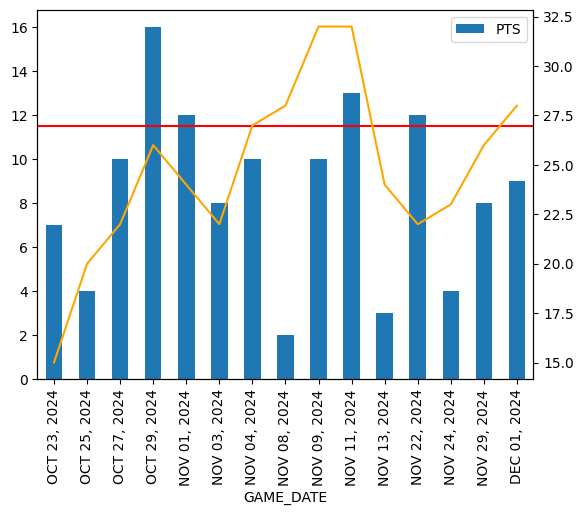

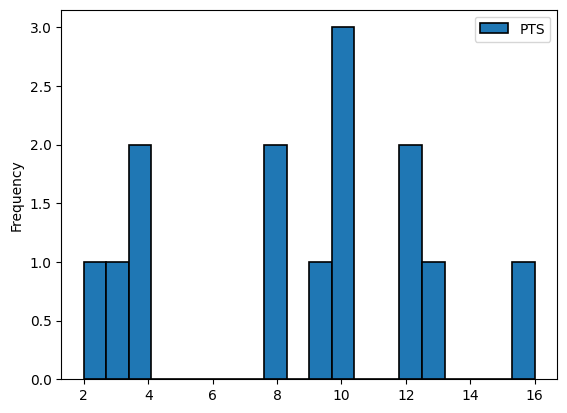

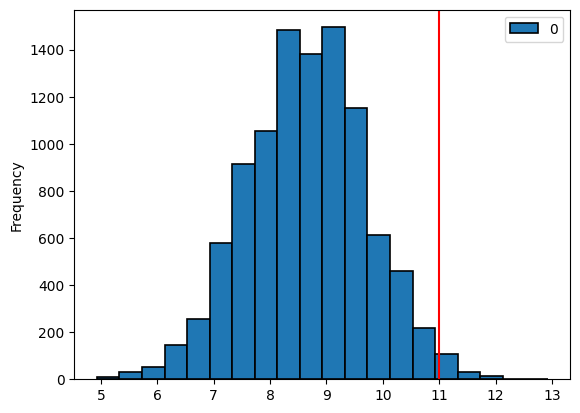

In [ ]:
from nba_api.stats.endpoints import playergamelog

career = playergamelog.PlayerGameLog(player_id=playerid, season='2024', season_type_all_star='Regular Season')
old = playergamelog.PlayerGameLog(player_id=playerid, season='2023', season_type_all_star='Regular Season')
# old_1 = playergamelog.PlayerGameLog(player_id=playerid, season='2022', season_type_all_star='Regular Season')
career = career.get_data_frames()[0]
old = old.get_data_frames()[0]
# old_1 = old_1.get_data_frames()[0]

df = pd.concat([career, old], axis=0)
df = career

df = df.get(['GAME_DATE', 'MATCHUP', stat, "MIN"])
# df = df.sort_values(by='GAME_DATE', ascending=True)
df = df.loc[::-1]

df.plot(kind='bar', x='GAME_DATE', y=stat)
plt.axhline(y=moneyline, color='r', linestyle='-')
ax = plt.gca()  # Get the current Axes object
ax2 = ax.twinx()  # Create a secondary y-axis
ax2.plot(df['GAME_DATE'], df['MIN'], color='orange', label='MIN')

#if the player is min played under 2 std devs of mean minutes played, remove from dataset
df = df[df['MIN'] > df['MIN'].mean() - 2 * df['MIN'].std()]

# df.plot(kind='bar', x='GAME_DATE', y=stat)
# plt.axhline(y=moneyline, color='r', linestyle='-')
# ax = plt.gca()  # Get the current Axes object
# ax2 = ax.twinx()  # Create a secondary y-axis
# ax2.plot(df['GAME_DATE'], df['MIN'], color='orange', label='MIN')
# print(df.head())

# print(df.head())


df.plot(kind='hist', y=stat, edgecolor='black', bins=20, linewidth=1.2)

boot_pts = np.array([])
for i in np.arange(10000):
  q = np.random.choice(df[stat], size=df.shape[0], replace=True)
  boot_pts = np.append(boot_pts, q.mean())

# create df with boot_pts as col
df_boot_pts = pd.DataFrame(boot_pts)
df_boot_pts.plot(kind='hist', edgecolor='black', linewidth=1.2, bins = 20)
if overunder == "over":
  plt.axvline(x=moneyline+0.5, color='red')
else:
  plt.axvline(x=moneyline-0.5, color='red')

print("95% conf interval: ", np.percentile(df_boot_pts, 2.5), np.percentile(df_boot_pts, 97.5))
if overunder == "over":
  print("p value: ", np.count_nonzero(df_boot_pts.get(0) <= moneyline+0.5) / df_boot_pts.shape[0])
else:
  print("p value: ", np.count_nonzero(df_boot_pts.get(0) >= moneyline-0.5) / df_boot_pts.shape[0])

In [ ]:

#get number of games above moneyline
over_prop = df[df[stat] > moneyline].shape[0] / df.shape[0]
under_prop = df[df[stat] < moneyline].shape[0] / df.shape[0]

#these values represent H0 values for prop

#given overunder, calculate probability of observing an "over" or an "under" with the H0 conditions
print("over prob", over_prop)
print("under prob", under_prop)
#simulate
# plt.clf()
# if overunder == "over":
#   simulation = np.random.binomial(df.shape[0], over_prop, 10000)
#   #plot simulated values on new plot

#   plt.hist(simulation, bins=20, edgecolor='black', linewidth=1.2)
#   plt.axvline(x=moneyline, color='red')
#   print("p-value", np.count_nonzero(simulation) / simulation.shape[0])
# else:
#   simulation = np.random.binomial(df.shape[0], under_prop, 10000)
#   plt.hist(simulation, bins=20, edgecolor='black', linewidth=1.2)
#   plt.axvline(x=moneyline, color='red')
#   print("p-value", np.count_nonzero(simulation) / simulation.shape[0])
# plt.show()



over prob 0.2857142857142857
under prob 0.7142857142857143
